<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [2]:

"""
Other/Again - Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####

# Read in CSV
df = pd.read_csv('./data/job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
# Parse away all the html tags and keep text in a new row
def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text()
df['clean_desc'] = df['description'].apply(clean_description)
df.head()

,Unnamed: 0,description,title,clean_desc
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


## 2) Use Spacy to tokenize the listings 

In [5]:
##### Your Code Here #####

# Tokenize the listings from the clean_desc column

# Import
import spacy
from spacy.tokenizer import Tokenizer

# Load it up
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [6]:
# Strip away the letter 'b' at beginning of each cell of the clean_desc column
df['clean_desc'] = df['clean_desc'].apply(lambda x: x.lstrip('b'))

# Gettiung to work
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['clean_desc'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens
df.tokens.head() # Also `df['tokens'].head()`

0    ["job, requirements:\nconceptual, understandin...
1    ['job, description\n\nas, data, scientist, 1,,...
2    ['as, data, scientist, working, consulting, bu...
3    ['$4,969, $6,756, monthcontractunder, general,...
4    ['location:, usa, \xe2\x80\x93, multiple, loca...
Name: tokens, dtype: object

In [7]:
# Let's create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
    
# Use the Function
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,data,419,3751,1.0,0.029948,0.029948,0.983568
129,business,303,1008,2.0,0.008048,0.037996,0.711268
51,experience,357,941,3.0,0.007513,0.045509,0.838028
0,work,326,876,4.0,0.006994,0.052503,0.765258
124,team,314,726,5.0,0.005796,0.058299,0.737089


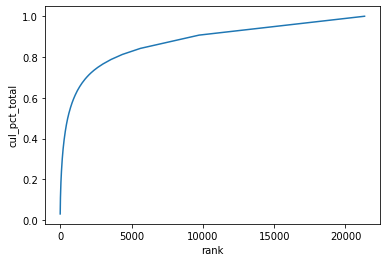

In [8]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

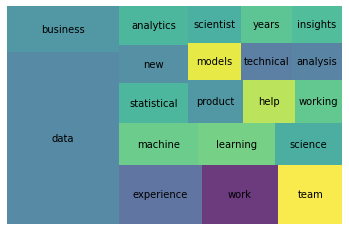

In [9]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [10]:
# ADD EXTRA STOP WORDS - SEARCH FOR THE "Extending Stop Words" IN:
# https://github.com/jacobpad/DS-Unit-4-Sprint-1-NLP/blob/master/module1-text-data/LS_DS_411_Text%20Data_Lecture.ipynb

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [11]:
##### Your Code Here #####

# Imports
from sklearn.feature_extraction.text import CountVectorizer

# create the transformer
vect = CountVectorizer(stop_words='english', max_features=1000)

# build vocab
vect.fit(df['clean_desc'])

# Transform the text
dtm = vect.transform(df['clean_desc'])

In [12]:
print(dtm)

  (0, 6)	1
  (0, 129)	1
  (0, 140)	1
  (0, 154)	1
  (0, 170)	1
  (0, 207)	1
  (0, 212)	1
  (0, 218)	1
  (0, 278)	1
  (0, 319)	2
  (0, 326)	1
  (0, 345)	1
  (0, 348)	1
  (0, 367)	1
  (0, 392)	1
  (0, 401)	1
  (0, 453)	1
  (0, 460)	1
  (0, 473)	1
  (0, 476)	1
  (0, 483)	2
  (0, 486)	1
  (0, 498)	1
  (0, 517)	1
  (0, 521)	1
  :	:
  (425, 892)	1
  (425, 894)	1
  (425, 898)	1
  (425, 902)	3
  (425, 903)	1
  (425, 904)	1
  (425, 916)	1
  (425, 917)	1
  (425, 920)	1
  (425, 923)	1
  (425, 928)	1
  (425, 932)	1
  (425, 935)	1
  (425, 936)	1
  (425, 944)	2
  (425, 948)	1
  (425, 953)	1
  (425, 968)	6
  (425, 970)	1
  (425, 971)	1
  (425, 978)	5
  (425, 980)	2
  (425, 986)	3
  (425, 995)	5
  (425, 998)	2


In [13]:
# Make each row represents a document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,4,0,2,3,1
422,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
423,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
424,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,1,0


In [14]:
totals = dtm.aggregate(['sum'])
totals

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
sum,52,35,39,43,28,41,318,122,37,71,...,28,49,28,33,114,1417,75,73,443,34


In [15]:
# And now for the top words
totals.sort_values(by='sum', ascending=False, axis=1)

,data,xe2,x80,experience,business,work,team,science,learning,analytics,...,extraction,peers,nlead,specifically,video,helps,request,uncover,drug,personalization
sum,4394,1417,1404,1238,1198,976,972,956,912,730,...,26,26,26,26,26,26,26,26,26,26


## 4) Visualize the most common word counts

In [16]:
##### Your Code Here #####

# Top words
top_words = totals.sort_values(by='sum', ascending=False, axis=1)
words = list(top_words.columns)[:20]
words

['data',
 'xe2',
 'x80',
 'experience',
 'business',
 'work',
 'team',
 'science',
 'learning',
 'analytics',
 'machine',
 'analysis',
 'skills',
 'nexperience',
 'models',
 'product',
 'statistical',
 'x99s',
 'solutions',
 'new']

In [17]:
count = list(top_words.iloc[0].values[:20])
count

[4394,
 1417,
 1404,
 1238,
 1198,
 976,
 972,
 956,
 912,
 730,
 686,
 675,
 673,
 616,
 614,
 578,
 566,
 564,
 530,
 527]

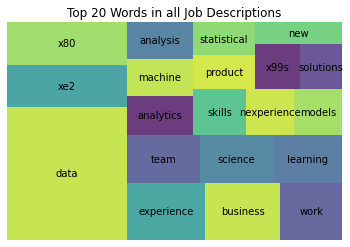

In [18]:
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=count, label=words, alpha=.8)
plt.axis('off')
plt.title("Top 20 Words in all Job Descriptions")
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [19]:
##### Your Code Here #####
# term-frequency inverse-document frequency (TF-IDF)

""" 
The purpose of TF-IDF is to find what is unique to each document. 
Because of this we will penalize the term frequencies of words that 
are common across all documents which will allow for each document's 
most different topics to rise to the top. 
"""

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['clean_desc'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [21]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['clean_desc']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,"$ 100,000",$ 300,$ 40,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,...,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.026648,0.0,0.029098,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.233208,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.133049,0.0,0.145279,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
dtm.shape

(426, 10739)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [23]:
##### Your Code Here #####

# Import
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [24]:
my_ideal_ds_job = ["""
    Data Science is a big deal. We want to hire you for the billions you're worth. This is 
    a fun place to work with plenty of budget to support any personal rowth goals you have.
    Most of all, people skills are required, because that's what'll make you unique as a 
    data scientist - having good people skills.
    Suggested skills: Python and any of its accessories.
"""]

obj = tfidf.transform(my_ideal_ds_job)
obj

<1x10739 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [25]:
# What does my_ideal_ds_job come close to?
nn.kneighbors(obj.todense())

(array([[1.34796656, 1.3482121 , 1.35088834, 1.35167605, 1.35187025]]),
 array([[140, 136, 293, 111, 287]]))

In [26]:
# Ok, the closest match is indexed at 140, then 136
# Let's see 140
df['clean_desc'][140]

'"*****Only local candidates will be consider for this role*****\\n\\nWho we are!\\n\\nHi, we are Chewse! Hundreds of offices work with us to run their employee meal programs and culture services. On a monthly basis, we serve over 19,000 people. Chewse delivers family-style office meals from the best local restaurants. We take on the burden of planning group meals, so companies large and small can focus on doing great work, with amazing people, on time. We outperform our competition around three core value propositions. 1) Curated Menus, 2) Local Restaurants, and 3) Consistent experience.\\n\\nWe are a unique little team that is constantly experimenting with the best ways to have a fun, fulfilling, and productive culture. If you want to be part of a team that is paving the way for the Culture as a Service (CaaS) industry, and working on big hairy problems in order to help facilitate authentic human connection, then please reach out to us. The work is not easy, but the positive impact i

In [27]:
# Now for 136
df['clean_desc'][136]

'"We\'re WAITR\\nWe\'re redefining the dining experience by building a world-class mobile ordering and delivery platform. We are building a two-sided marketplace that is helping small businesses grow and acquire new customers while also bringing concierge level convenience to thousands of consumers.\\nIf you like finding creative solutions to complex problems and have a good sense of humor, you came to the right place. Learn more about the Product and Engineering team here: https://waitrapp.com/careers/p... (https://waitrapp.com/careers/product-engineering)\\nNow, onto the role of a Data Scientist. As a data scientist, you will have the opportunity to leverage our data infrastructure to develop models that impact millions of users across our three audiences and tackle our most challenging business problems. You will work with data scientists, engineers, and product managers to develop and iterate on models to help us grow our business.\\nHere\'s how you\'ll be spending your week:\\nUse

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 

In [ ]:
# No thanks, it's been too long of a day!